### linuxMysql的基础配置

- 配置文件路径

   *   /etc/mysql/my.cnf
   *   ~/.my.cnf
   
#### 配置UTF8字符集
- 
  * su -
  * chmod 755 my.cnf
  * vi my.cnf
  
      [client]
      default-character-set=utf8
      [mysqld]
      character-set-server=utf8
  * 然后保存退出
  * 重启mysql服务 service mysql restart 即可
  * 查看一下现在mysql的编码
  * sudo mysql －u root -p

  * <mysql>show variables like 'character%';
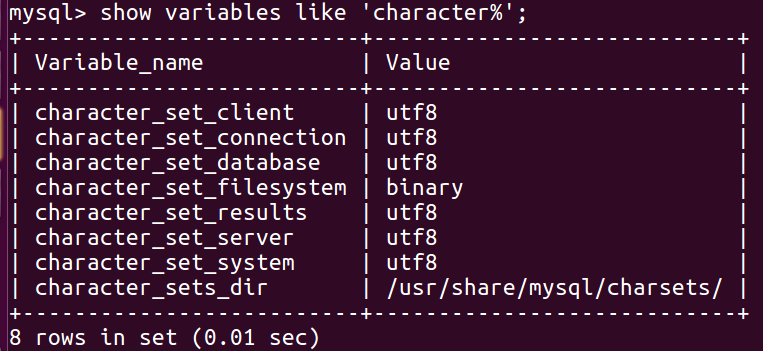

# 彻底解决：Django插入中文报错
#### Incorrect string value: '\xF0\x9F\x98\xAD",...' for column 'commentContent' at row 1
        
- 今天在爬取网易云音乐歌曲评论的时候，在将数据插入mysql数据库的时候，出现了Incorrect string value: '\xF0\x9F\x98\xAD",...' for column'commentContent' at row 1 这个错误，Google了下发现原来是因为数据库编码问题导致的，原因在于我们的评论数据中存在emoj表情，而这些表情是按照四个字节一个单位进行编码的，而我们通常使用的utf-8编码在mysql数据库中默认是按照3个字节一个单位进行编码的，正是这个原因导致将数据存入mysql数据库的时候出现错误，那么这个问题我们应该怎么解决呢？

        我分为下面三个步骤来解决：

        (1)：修改mysql数据库的编码为uft8mb4

        (2)：修改数据表的编码为utf8mb4

        (3)：修改连接数据库的连接代码

        (1)：修改mysql数据库的编码为uft8mb4

        修改方法：

        参看：http://blog.csdn.net/poice00/article/details/52129351

        (2)：修改数据表的编码为utf8mb4

        执行命令：ALTER TABLE TABLE_NAME CONVERT TO CHARACTER SET utf8mb4;

        (3)：修改连接数据库的连接代码

        我原先的数据库连接代码是：

        public static final String URL = "jdbc:mysql://localhost:3306/"+DATABASENAME+"?useunicode=true&characterEncoding=utf8";

        将其修改成：public static final String URL = "jdbc:mysql://localhost:3306/"+DATABASENAME;

##  Mysql 的个性化配置
 
    [client]  
    port = 3309 
    socket = /home/mysql/mysql/tmp/mysql.sock  
    [mysqld]  
    !include /home/mysql/mysql/etc/mysqld.cnf #包含的配置文件 ，把用户名，密码文件单独存放  
    port = 3309 
    socket = /home/mysql/mysql/tmp/mysql.sock  
    pid-file = /longxibendi/mysql/mysql/var/mysql.pid  
    basedir = /home/mysql/mysql/  
    datadir = /longxibendi/mysql/mysql/var/  
    # tmp dir settings  
    tmpdir = /home/mysql/mysql/tmp/  
    slave-load-tmpdir = /home/mysql/mysql/tmp/  
    #当slave 执行 load data infile 时用  
    #language = /home/mysql/mysql/share/mysql/english/  
    character-sets-dir = /home/mysql/mysql/share/mysql/charsets/  
    # skip options  
    skip-name-resolve #grant 时，必须使用ip不能使用主机名  
    skip-symbolic-links #不能使用连接文件  
    skip-external-locking #不使用系统锁定，要使用myisamchk,必须关闭服务器  
    skip-slave-start #启动mysql,不启动复制  
    #sysdate-is-now  
    # res settings  
    back_log = 50 #接受队列，对于没建立tcp连接的请求队列放入缓存中，队列大小为back_log，受限制与OS参数  
    max_connections = 1000 #最大并发连接数 ，增大该值需要相应增加允许打开的文件描述符数  
    max_connect_errors = 10000 #如果某个用户发起的连接error超过该数值，则该用户的下次连接将被阻塞，直到管理员执行flush hosts ; 命令；防止黑客  
    #open_files_limit = 10240 
    connect-timeout = 10 #连接超时之前的最大秒数,在Linux平台上，该超时也用作等待服务器首次回应的时间  
    wait-timeout = 28800 #等待关闭连接的时间  
    interactive-timeout = 28800 #关闭连接之前，允许interactive_timeout（取代了wait_timeout）秒的不活动时间。客户端的会话wait_timeout变量被设为会话interactive_timeout变量的值。  
    slave-net-timeout = 600 #从服务器也能够处理网络连接中断。但是，只有从服务器超过slave_net_timeout秒没有从主服务器收到数据才通知网络中断  
    net_read_timeout = 30 #从服务器读取信息的超时  
    net_write_timeout = 60 #从服务器写入信息的超时  
    net_retry_count = 10 #如果某个通信端口的读操作中断了，在放弃前重试多次  
    net_buffer_length = 16384 #包消息缓冲区初始化为net_buffer_length字节，但需要时可以增长到max_allowed_packet字节  
    max_allowed_packet = 64M #  
    #table_cache = 512 #所有线程打开的表的数目。增大该值可以增加mysqld需要的文件描述符的数量  
    thread_stack = 192K #每个线程的堆栈大小  
    thread_cache_size = 20 #线程缓存  
    thread_concurrency = 8 #同时运行的线程的数据 此处最好为CPU个数两倍。本机配置为CPU的个数  
    # qcache settings  
    query_cache_size = 256M #查询缓存大小  
    query_cache_limit = 2M #不缓存查询大于该值的结果  
    query_cache_min_res_unit = 2K #查询缓存分配的最小块大小  
    # default settings  
    # time zone  
    default-time-zone = system #服务器时区  
    character-set-server = utf8 #server级别字符集  
    default-storage-engine = InnoDB #默认存储  
    # tmp & heap  
    tmp_table_size = 512M #临时表大小，如果超过该值，则结果放到磁盘中  
    max_heap_table_size = 512M #该变量设置MEMORY (HEAP)表可以增长到的最大空间大小  
    log-bin = mysql-bin #这些路径相对于datadir  
    log-bin-index = mysql-bin.index  
    relayrelay-log = relay-log  
    relayrelay_log_index = relay-log.index  
    # warning & error log  
    log-warnings = 1 
    log-error = /home/mysql/mysql/log/mysql.err  
    log_output = FILE #参数log_output指定了慢查询输出的格式，默认为FILE，你可以将它设为TABLE，然后就可以查询mysql架构下的slow_log表了  
    # slow query log  
    slow_query_log = 1 
    long-query-time = 1 #慢查询时间 超过1秒则为慢查询  
    slow_query_log_file = /home/mysql/mysql/log/slow.log  
    #log-queries-not-using-indexes  
    #log-slow-slave-statements  
    general_log = 1 
    general_log_file = /home/mysql/mysql/log/mysql.log  
    max_binlog_size = 1G 
    max_relay_log_size = 1G 
    # if use auto-ex, set to 0  
    relay-log-purge = 1 #当不用中继日志时，删除他们。这个操作有SQL线程完成  
    # max binlog keeps days  
    expire_logs_days = 30 #超过30天的binlog删除  
    binlog_cache_size = 1M #session级别  
    # replication  
    replicate-wild-ignore-table = mysql.% #复制时忽略数据库及表  
    replicate-wild-ignore-table = test.% #复制时忽略数据库及表  
    # slave_skip_errors=all 
    key_buffer_size = 256M #myisam索引buffer,只有key没有data  
    sort_buffer_size = 2M #排序buffer大小；线程级别  
    read_buffer_size = 2M #以全表扫描(Sequential Scan)方式扫描数据的buffer大小 ；线程级别  
    join_buffer_size = 8M # join buffer 大小;线程级别  
    read_rnd_buffer_size = 8M #MyISAM以索引扫描(Random Scan)方式扫描数据的buffer大小 ；线程级别  
    bulk_insert_buffer_size = 64M #MyISAM 用在块插入优化中的树缓冲区的大小。注释：这是一个per thread的限制  
    myisam_sort_buffer_size = 64M #MyISAM 设置恢复表之时使用的缓冲区的尺寸,当在REPAIR TABLE或用CREATE INDEX创建索引或ALTER TABLE过程中排序 MyISAM索引分配的缓冲区  
    myisam_max_sort_file_size = 10G #MyISAM 如果临时文件会变得超过索引，不要使用快速排序索引方法来创建一个索引。注释：这个参数以字节的形式给出.重建MyISAM索引(在REPAIR TABLE、ALTER TABLE或LOAD DATA INFILE过程中)时，允许MySQL使用的临时文件的最大空间大小。如果文件的大小超过该值，则使用键值缓存创建索引，要慢得多。该值的单位为字节  
    myisam_repair_threads = 1 #如果该值大于1，在Repair by sorting过程中并行创建MyISAM表索引(每个索引在自己的线程内)  
    myisam_recover = 64K#允许的GROUP_CONCAT()函数结果的最大长度  
    transaction_isolation = REPEATABLE-READ  
    innodb_file_per_table  
    #innodb_status_file = 1 
    #innodb_open_files = 2048 
    innodb_additional_mem_pool_size = 100M #帧缓存的控制对象需要从此处申请缓存，所以该值与innodb_buffer_pool对应  
    innodb_buffer_pool_size = 2G #包括数据页、索引页、插入缓存、锁信息、自适应哈希所以、数据字典信息  
    innodb_data_home_dir = /longxibendi/mysql/mysql/var/  
    #innodb_data_file_path = ibdata1:1G:autoextend  
    innodb_data_file_path = ibdata1:500M;ibdata2:2210M:autoextend #表空间  
    innodb_file_io_threads = 4 #io线程数  
    innodb_thread_concurrency = 16 #InnoDB试着在InnoDB内保持操作系统线程的数量少于或等于这个参数给出的限制  
    innodb_flush_log_at_trx_commit = 1 #每次commit 日志缓存中的数据刷到磁盘中  
    innodb_log_buffer_size = 8M #事物日志缓存  
    innodb_log_file_size = 500M #事物日志大小  
    #innodb_log_file_size =100M 
    innodb_log_files_in_group = 2 #两组事物日志  
    innodb_log_group_home_dir = /longxibendi/mysql/mysql/var/#日志组  
    innodb_max_dirty_pages_pct = 90 #innodb主线程刷新缓存池中的数据，使脏数据比例小于90%  
    innodb_lock_wait_timeout = 50 #InnoDB事务在被回滚之前可以等待一个锁定的超时秒数。InnoDB在它自己的 锁定表中自动检测事务死锁并且回滚事务。InnoDB用LOCK TABLES语句注意到锁定设置。默认值是50秒  
    #innodb_flush_method = O_DSYNC 
    [mysqldump]  
    quick  
    max_allowed_packet = 64M 
    [mysql]  
    disable-auto-rehash #允许通过TAB键提示  
    default-character-set = utf8 
    connect-timeout = 3 

## Anaconda 基本命令
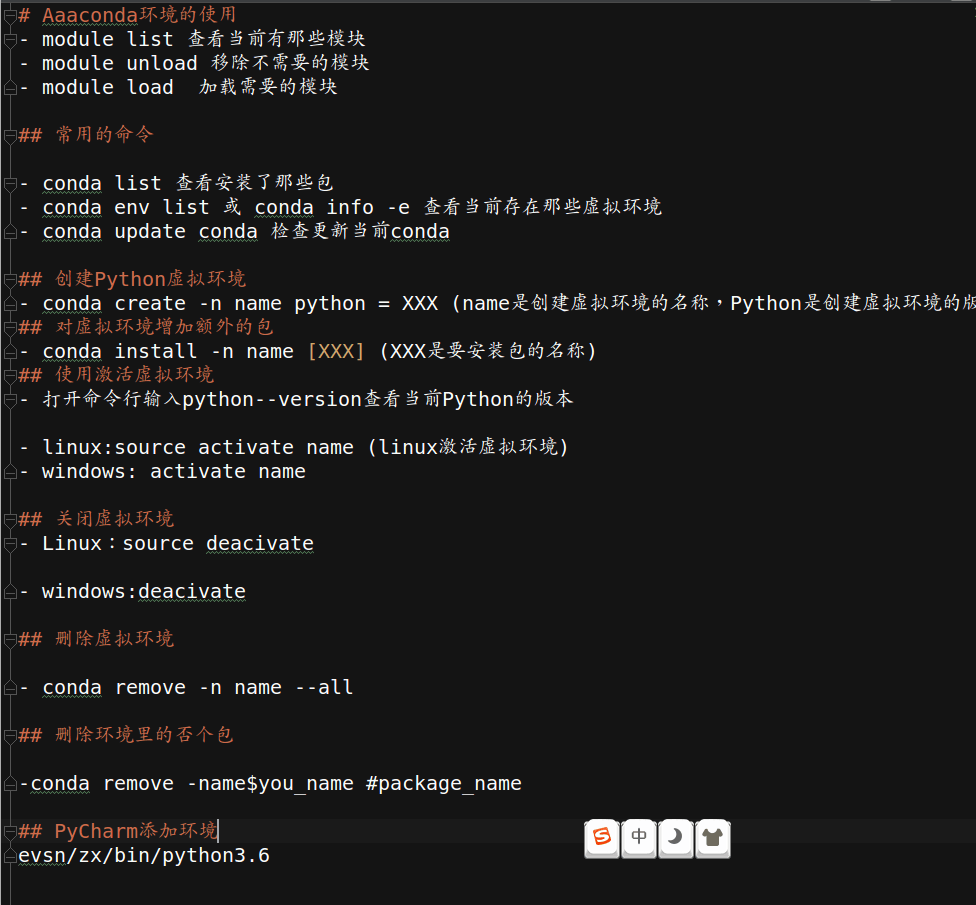

## 虚拟环境的创建

- 安装虚拟环境

        sudo pip install virtualenv

        sudo pip install virtualenvwrapper

- 在python3 中创建虚拟环境

        mkvirtualenv -p python3 虚拟环境名称
        mkvirtualenv -p python py3_django
       
- 启动虚拟环境
        
        workon +Tab键选择
        
- 在conda下面启动

        source activate + 虚拟环境名称
- 退出虚拟环境
        
        deactivate
        source deactivate(conda环境)
- django 依赖的包

        pip3 install amqp
        pip3 install billiard
        pip3 install celery
        pip3 install certifi
        pip3 install chardet
        pip3 install Click
        pip3 install Django
        pip3 install django-haystack
        pip3 install django-redis
        pip3 install django-redis-sessions
        pip3 install django-tinymce
        pip3 install fdfs-client-py
        pip3 install Flask
        pip3 install idna
        pip3 install itsdangerous
        pip3 install jieba
        pip3 install Jinja2
        pip3 install kombu
        pip3 install MarkupSafe
        pip3 install mutagen
        pip3 install Pillow
        pip3 install pip
        pip3 install pycryptodome
        pip3 install pycryptodomex
        pip3 install PyMySQL
        pip3 install python-alipay-sdk
        pip3 install pytz
        pip3 install redis
        pip3 install redis-py-cluster
        pip3 install requests
        pip3 install setuptools
        pip3 install urllib3
        pip3 install uWSGI
        pip3 install vine
        pip3 install Werkzeug
        pip3 install wheel
        pip3 install Whoosh
        pip3 install six
        pip3 install pefile
        pip3 install haystack
        pip3 install future
        
        
        pip install Django
        pip install amqp
        pip install billiard
        pip install celery
        pip install certifi
        pip install chardet
        pip install Click
        pip install django-haystack
        pip install django-redis
        pip install django-redis-sessions
        pip install django-tinymce
        pip install fdfs-client-py
        pip install Flask
        pip install idna
        pip install itsdangerous
        pip install jieba
        pip install Jinja2
        pip install kombu
        pip install MarkupSafe
        pip install mutagen
        pip install Pillow
        pip install pip
        pip install pycryptodome
        pip install pycryptodomex
        pip install PyMySQL
        pip install python-alipay-sdk
        pip install pytz
        pip install redis
        pip install redis-py-cluster
        pip install requests
        pip install setuptools
        pip install urllib3
        pip install uWSGI
        pip install vine
        pip install Werkzeug
        pip install wheel
        pip install Whoosh
        pip install six
        pip install pefile
        pip install haystack
        pip install future
        
        
        